In [2]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')

In [4]:
import cv2
import numpy as np
import pytesseract 
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

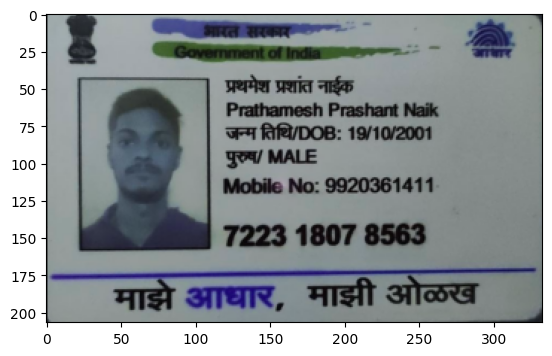

In [6]:
img = cv2.imread("/home/chiragsp/Documents/Code/angular-electron/app/aadhar_prathmesh.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="eng")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf']

In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', text.shape[0]+1)

In [8]:
print("text1 : \n")
print(text1,"\n\n")

print("text : \n")
print(text, "\n\n")
  
print("lines : \n")
for i in range(len(lines)):
  print("level", i, ": ", lines.iloc[i])

print("\n\n conf : \n")
print(conf)

text1 : 

    level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
0       1         1          0        0         0         0     0    0    333   
..    ...       ...        ...      ...       ...       ...   ...  ...    ...   
4       5         1          1        1         1         1     0    0    333   

    height  conf text  
0      207    -1  NaN  
..     ...   ...  ...  
4      207    95       

[5 rows x 12 columns] 


text : 

   level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
4      5         1          1        1         1         1     0    0    333   

   height  conf text  
4     207    95        


lines : 

level 0 :  [' ']


 conf : 



In [11]:
from pytesseract import Output

img = cv2.imread('/home/chiragsp/Documents/Code/angular-electron/app/aadhar_prathmesh.png')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


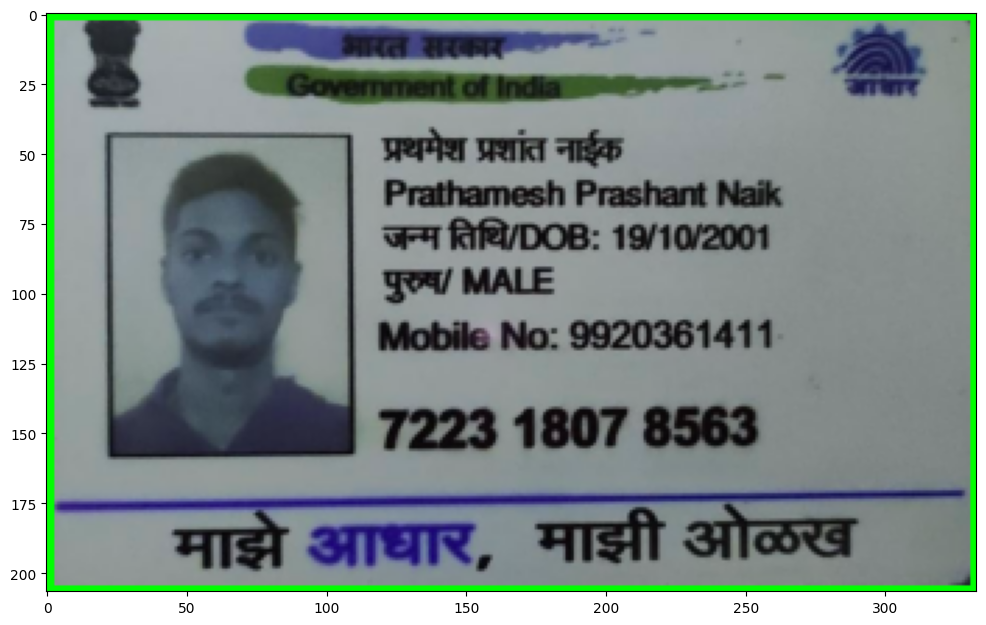

In [12]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 0:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

display(img)

In [ ]:
import easyocr

In [ ]:
reader = easyocr.Reader(['en'],gpu = False)

In [ ]:
results = reader.readtext('/home/chiragsp/Documents/Code/angular-electron/app/aadhar_prathmesh.png')

In [ ]:
results

[([[287, 27], [457, 27], [457, 60], [287, 60]],
  'CRGHran',
  0.0009441448804816821),
 ([[232, 62], [513, 62], [513, 100], [232, 100]],
  'Govemnento Inda',
  0.1956506757827141),
 ([[325, 119], [575, 119], [575, 163], [325, 163]],
  '4etU mriat 714',
  0.05718953632223487),
 ([[331, 169], [733, 169], [733, 207], [331, 207]],
  'Prathamesh Prashant Naik',
  0.9778928168345447),
 ([[328, 202], [722, 202], [722, 251], [328, 251]],
  'J4AfIDOB: 19/10/2001',
  0.27325987947407554),
 ([[327, 255], [507, 255], [507, 299], [327, 299]],
  '9al MALE',
  0.15743201945870947),
 ([[323, 303], [723, 303], [723, 347], [323, 347]],
  'Mobile No: 9920361411',
  0.9925852106288501),
 ([[321, 385], [711, 385], [711, 447], [321, 447]],
  '7223 1807 8563',
  0.9945896244097928),
 ([[115, 497], [435, 497], [435, 565], [115, 565]],
  'H1A &R_',
  0.08540111482688682),
 ([[472, 488], [810, 488], [810, 562], [472, 562]],
  'Hifi &&',
  0.14098094935902908)]